In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
lr = 1

<h2>Define your input data and expected labels</h2>

In [3]:
x = np.array([[0,0],[1,0],[1,1],[0,1]], dtype=np.float32)
y = np.array([[0], 
              [1], 
              [0], 
              [1]], dtype=np.float32)

<h2>Define the neural network</h2>

In [15]:
model = tf.keras.models.Sequential()
# input layer
model.add(tf.keras.Input(shape=(2,)))
# Dense: out=activation(dot(input,kernel)+bias)
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid))
# output layer
model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['mse', 'accuracy'])

<h2>Define cost function</h2>

<h2>Execute training</h2>

In [16]:
model.fit(x, y, batch_size=1, epochs=500, verbose=False)

<h2>Plot</h2>

In [17]:
predictions = model.predict(x)
print(predictions)

w0 = model.layers[0].get_weights()[0]
w1 = model.layers[1].get_weights()[0]
b0 = model.layers[0].get_weights()[1]
b1 = model.layers[0].get_weights()[1]

[[0.00661768]
 [0.9949366 ]
 [0.00575525]
 [0.9949722 ]]


In [18]:
print(w0, w1)
print(b0, b1)

[[ 6.495818  -6.9645476]
 [-6.7847157  6.715721 ]] [[11.467136]
 [11.423147]]
[-3.5434957 -3.6688511] [-3.5434957 -3.6688511]


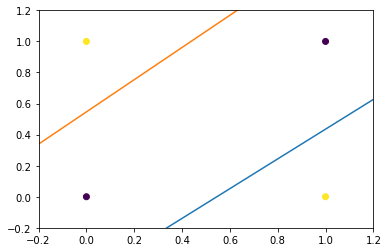

In [28]:
px = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1] + 0.2)])
p1 = 1 / w0[1,0] * (-w0[0,0] * px - b1[0])
p2 = 1 / w0[1,1] * (-w0[0,1] * px - b1[1])

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))
plt.plot(px, p1)
plt.plot(px, p2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.2])
plt.show()